# Introduction

- <b>This notebook provides a sample guideline on how you can prepare your raw data from various data sources for Machine Learining and Data analysis.The notebook is more focused on the data preprocessing process. </b>

<b>
 NOTE :
- The whole process may not apply to all datasets so its advisable to use your domain expertise to apply the necessary techniques on your datasets to get the desired results. </b>

# The Data Science workflow

- <b>The data science workflow consists of six major steps which are not linear. This means that depending on your task you will need to go back and forth through this process. </b>
- <b>The six steps include:
   - Scoping a project
   - Gathering Data
   - Cleaning Data
   - Exploring Data
   - Modeling Data
   - Sharing Insights </b>

# 1. Scoping a project

- <b>It involves clearly defining your objectives you need to achieve given certain datasets. Some of these objectives may include :
    - Who are your end users or stakeholders?
    - What business problems are you trying to solve?
    - Which Machine Learning algorithms are you going to use? </b>
- <b>Scoping steps include :
    - Think like an end user
    - Brainstorm problems and solutions
    - Identify data requirements and techniques </b>

# 2. Gathering Data

 - <b> Gathering the right data is essential to set a proper foundation for your analysis. </b>
 - <b>This process involves :
    - Finding the data from data sources eg Local files, Databases, Web access etc
    - Reading it into python
    - Transforming it if necessary
    - Storing the data into Pandas DataFrame </b>

#### Reading files into python using different file formats

In [95]:
# Import the Pandas library
import pandas as pd

In [96]:
# Reading csv formats
df_csv = pd.read_csv("Data/cardio_base.csv")
df_csv.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0


In [97]:
# Reading excel formats
df_excel = pd.read_excel("Data/Groceries.xlsx")
df_excel.head(3)

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment
0,P100010,Produce: Fruit,Apple,1.5,349,2023-06-12 15:35:00,2023-06-15
1,P100011,Produce: Fruit,Banana,0.4,500,2023-06-12 18:30:00,2023-06-15
2,P100012,Produce: Fruit,Grapes,4.0,200,2023-06-12 17:22:00,2023-06-15


In [98]:
# Reading data from the database

# Importing the database connector
import sqlite3

# Connect to the database
connect = sqlite3.connect('Data/maven.db')

# We can read the data using pandas
df_sql = pd.read_sql('select * from courses',connect)
df_sql.head(3)

,course_id,course,instructor
0,101,Intro to Python,Chris Bruehl
1,102,Intro to SQL,John Pauler
2,201,Exploratory Data Analysis,Alice Zhao


#### Exploring a DataFrame
- This helps to ensure that the data was imported correctly

In [99]:
# head - displays the first rows of a DataFrame
# We can also pass an argument of how many rows we want to see as we did above

df_csv.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [100]:
# shape - displays the number of rows and columns in a dataFrame
# Groceries have 25 rows and 7 columns

df_excel.shape

(25, 7)

In [101]:
# count - displays the number of values in each column
# we have a total of 5 courses in our database

df_sql.course.count()

5

In [102]:
# describe - displays summary statistics like mean, min and max
# The mean,min and max of the height column in our csv data is 164..., 55,250

df_csv.height.mean() , df_csv.height.min() , df_csv.height.max()

(164.35922857142856, 55, 250)

In [103]:
# info - displays the non-null values and data types of each column
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


# 3. Cleaning the data

- Cleaning the data involves converting columns to the correct data types, handling data issues and creating new columns for analysis.
- Common data issues include :
    - Duplicates
    - Outliers
    - Missing Data
    - Inconsistent text & typos

### a) converting columns into the correct type

In [104]:
# we use .dtypes to check the data types of each column in a dataset
df_csv.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
smoke            int64
dtype: object

- When converting object columns to numeric columns we use pd.to_numeric()
- When converting object columns to datetime columns we use pd.to_datetime()
- To change the date format we use pd.to_datetime(dt_col,format ='%Y-%M-%D')

In [105]:
# When converting object columns to numeric columns we use pd.to_numeric()
data_runtime = pd.read_excel("Data/Run Times.xlsx")
data_runtime.head(3)

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50


In [106]:
# checking the dtypes
data_runtime.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                     object
dtype: object

In [107]:
# converting the Warm Up Time column to numeric from object
# To achieve this we must ensure that the column contains data of the same type 
# the purpose of this code was to remove min string from the values in the Warm Up Time column

data_runtime['Warm Up Time'] = data_runtime['Warm Up Time'].astype('str').str.replace(' min','')
data_runtime

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


In [108]:
# converting the Warm Up Time column to numeric from object
# now the data type of the warm up column has changed from object to a float

data_runtime['Warm Up Time'] = pd.to_numeric(data_runtime['Warm Up Time'])
data_runtime.dtypes

Name                    object
Run Time               float64
Warm Up Time           float64
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                     object
dtype: object

### b) Identifying and handling missing data

- The easiest way to identify missing data is with the <b>.isna()</b> method.
- You can also use <b>.info()</b> or <b>the .value_counts().</b>
- You can handle missing data by either mean,mode or median or fill them using 0 or droping the rows and columns with missing data.
- <b>Note</b> : The best way to fill the missing values is by using your domain expertise knowledge.

In [109]:
# Checking for missing data using the isna() which returns true if any and false is not
data_runtime.isna()

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [110]:
# checking another dataset using the isna.sum() which returns the total missing values - no missing values
df_csv.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

In [111]:
# using .info() to check on the missing values - no missing values
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_ID               25 non-null     object        
 1   Category                 25 non-null     object        
 2   Item                     25 non-null     object        
 3   Price_Dollars            25 non-null     float64       
 4   Inventory                25 non-null     int64         
 5   Last_Updated             25 non-null     datetime64[ns]
 6   Next_Scheduled_Shipment  25 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 1.5+ KB


- The <b>.dropna()</b> method is used to remove rows with missing data.
- After removing some data we reset the rows using the <b>.reset_index()</b>

In [112]:
# Loading a dataset that has missing values
students = pd.read_excel("Data/Student Grades.xlsx")
students.sample(5)

,Student,Class,Year,Grade
22,Matthew,Intro to Python,Freshman,87.0
15,Daniel,Intro to Python,Freshman,85.0
28,Abigail,Intro to Python,Freshman,89.0
1,Olivia,Freshman Seminar,Freshman,86.0
25,Lucas,Intro to Python,Freshman,77.0


In [135]:
# checking for the missing values so that we can work on them
students.isna().sum()

Student    0
Class      0
Year       0
Grade      0
dtype: int64

In [117]:
# Let's fill the Grade with the mean
# If you run the cell above you will find that Grade column has missing values

students.Grade = students.Grade.fillna(students.Grade.mean())

In [118]:
# Let's fill the missing year by imputing senior using the numpy where method
import numpy as np

students.Year = np.where(students.Year.isna(),'Senior',students.Year)

In [133]:
# Lets drop the remaining missing values using the dropna method
# We're using the .values to extract the first no-missing values

students.Student = students.Student.fillna(students.Student.dropna().values[0])

In [134]:
students.Class = students.Class.fillna(students.Class.dropna().values[0])

### c) Identifying and handling duplicated values

- We identify duplicated data by using <b>.duplicated</b> method which returns false for no duplicates and true for duplicates.
- We remove duplicates by using the <b>drop_duplicated<> method.

### d) Outliers

- Outliers are values in a dataset that are much bigger or smaller than others.
- Outliers are identified by using plots and statistics ie histogram,box plot,standard deviation
- Outliers are handled by either keeping them,removing the rows and columns where they exist or imputing them with NaN values or by resolving them using your domain experitise.

#### Histogram
- It help to identify outliers by showing which values fall outside of the normal range
- We use seaborn library to visualize the plots.

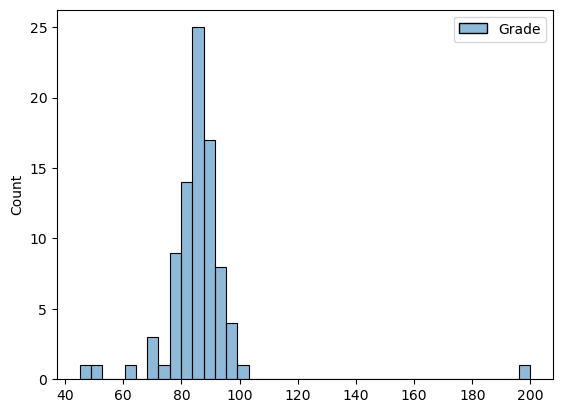

In [139]:
# Importing seaborn library
import seaborn as sns

# plotting the histogram
# From the histogram we have four outliers
sns.histplot(students);


#### Boxplot
- They automatically plot outliers as dots outside of the min/max data range.
- The width of the box is the <b>interquartile range(IQR)</b>, which is the middle 50% of the data.
- Any value farther away than (1.5 * IQR) from each side of the box is considered an outlier.

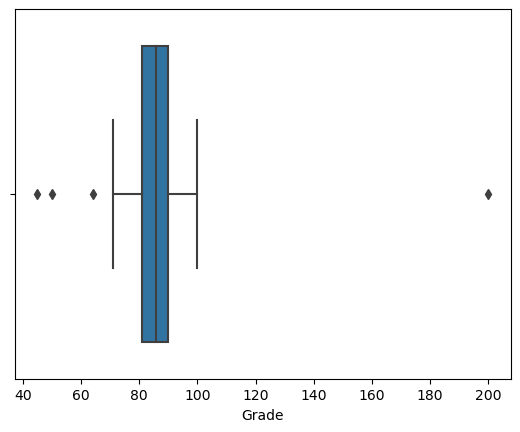

In [141]:
# ploting a boxplot
# shows the four outliers we have

sns.boxplot(x=students.Grade);

#### Standard deviation
- It is the measure of the spread of a dataset from the mean.
- Values at least 3 standard deviations away from the mean are considered outliers. This is meant for normaly distributed data.
- The threshold of 3 standard deviations can be changed to 2 or 4 depending on the data.

In [152]:
# getting the mean and the std
mean = np.mean(students.Grade)
std =  np.std(students.Grade)

mean, std

(85.70731707317074, 15.069210720583541)

In [150]:
# Returning the outliers
[grade for grade in students.Grade 
 if (grade < mean - 2*std) or 
 (grade > mean + 2*std)]

[50.0, 45.0, 200.0]

# 4. Exploratory Data Analysis (EDA)